In [1]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime, date, time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

plt.rc('font', family='malgun gothic')    # 한글처리
plt.rcParams['axes.unicode_minus']=False  # '- 표시

In [2]:
path = 'Data/대전태평(암반)/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]
file_list_py

['대전태평(암반)_2009_hr.xlsx',
 '대전태평(암반)_2010_hr.xlsx',
 '대전태평(암반)_2011_hr.xlsx',
 '대전태평(암반)_2012_hr.xlsx',
 '대전태평(암반)_2013_hr.xlsx',
 '대전태평(암반)_2014_hr.xlsx',
 '대전태평(암반)_2015_hr.xlsx',
 '대전태평(암반)_2016_hr.xlsx']

In [3]:
df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_excel(path + i)
    df = pd.concat([df , data])
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
8761,대전태평,(암반),20161231,19,16.2,44.49,725
8762,대전태평,(암반),20161231,20,16.2,44.49,725
8763,대전태평,(암반),20161231,21,16.2,44.49,725
8764,대전태평,(암반),20161231,22,16.2,44.49,725


In [4]:
df = df.reset_index(drop = True)
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
69543,대전태평,(암반),20161231,19,16.2,44.49,725
69544,대전태평,(암반),20161231,20,16.2,44.49,725
69545,대전태평,(암반),20161231,21,16.2,44.49,725
69546,대전태평,(암반),20161231,22,16.2,44.49,725


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69548 entries, 0 to 69547
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관측소       69548 non-null  object 
 1   구분        69548 non-null  object 
 2   날짜        69548 non-null  int64  
 3   시간        69548 non-null  int64  
 4   수온(℃)     69548 non-null  float64
 5   수위(el.m)  69548 non-null  float64
 6   EC(㎲/㎝)   69548 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.7+ MB


In [7]:
df['Date'] = pd.to_datetime(df['날짜'],format='%Y%m%d') \
             + pd.to_timedelta(df['시간'].astype(int), unit = 'h')
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝),Date
0,대전태평,(암반),20090101,0,16.1,44.47,749,2009-01-01 00:00:00
1,대전태평,(암반),20090101,1,16.1,44.47,749,2009-01-01 01:00:00
2,대전태평,(암반),20090101,2,16.1,44.47,749,2009-01-01 02:00:00
3,대전태평,(암반),20090101,3,16.1,44.47,749,2009-01-01 03:00:00
4,대전태평,(암반),20090101,4,16.1,44.47,749,2009-01-01 04:00:00
...,...,...,...,...,...,...,...,...
69543,대전태평,(암반),20161231,19,16.2,44.49,725,2016-12-31 19:00:00
69544,대전태평,(암반),20161231,20,16.2,44.49,725,2016-12-31 20:00:00
69545,대전태평,(암반),20161231,21,16.2,44.49,725,2016-12-31 21:00:00
69546,대전태평,(암반),20161231,22,16.2,44.49,725,2016-12-31 22:00:00


In [8]:
df.set_index(df['Date'], inplace = True)
df.head(3)

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝),Date
Date,,,,,,,,
2009-01-01 00:00:00,대전태평,(암반),20090101,0,16.1,44.47,749,2009-01-01 00:00:00
2009-01-01 01:00:00,대전태평,(암반),20090101,1,16.1,44.47,749,2009-01-01 01:00:00
2009-01-01 02:00:00,대전태평,(암반),20090101,2,16.1,44.47,749,2009-01-01 02:00:00


In [11]:
df1 = df[['수온(℃)','수위(el.m)','EC(㎲/㎝)']]
df1

,수온(℃),수위(el.m),EC(㎲/㎝)
Date,,,
2009-01-01 00:00:00,16.1,44.47,749
2009-01-01 01:00:00,16.1,44.47,749
2009-01-01 02:00:00,16.1,44.47,749
2009-01-01 03:00:00,16.1,44.47,749
2009-01-01 04:00:00,16.1,44.47,749
...,...,...,...
2016-12-31 19:00:00,16.2,44.49,725
2016-12-31 20:00:00,16.2,44.49,725
2016-12-31 21:00:00,16.2,44.49,725


In [12]:
df1.columns = ['temp','level','EC']
df1.head(3)

,temp,level,EC
Date,,,
2009-01-01 00:00:00,16.1,44.47,749
2009-01-01 01:00:00,16.1,44.47,749
2009-01-01 02:00:00,16.1,44.47,749


In [13]:
df1.isnull().sum()

temp     0
level    0
EC       0
dtype: int64

In [14]:
df1.to_csv('Data/대전태평(암반)/대전지하수.csv')

In [15]:
df = pd.read_csv('Data/대전태평(암반)/대전지하수.csv', index_col = 'Date')
df.head(2)

,temp,level,EC
Date,,,
2009-01-01 00:00:00,16.1,44.47,749
2009-01-01 01:00:00,16.1,44.47,749


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69548 entries, 2009-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    69548 non-null  float64
 1   level   69548 non-null  float64
 2   EC      69548 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.1+ MB


In [18]:
df = pd.read_csv('Data/대전태평(암반)/대전지하수.csv', index_col = 'Date', parse_dates = True)
df.head(2)

,temp,level,EC
Date,,,
2009-01-01 00:00:00,16.1,44.47,749
2009-01-01 01:00:00,16.1,44.47,749


In [20]:
df.info() # Look at Datetime index (DateTime Format)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69548 entries, 2009-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    69548 non-null  float64
 1   level   69548 non-null  float64
 2   EC      69548 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.1 MB


In [21]:
df.describe()

,temp,level,EC
count,69548.000000,69548.000000,69548.000000
mean,16.262491,44.295353,727.024027
std,0.089778,2.539464,51.544590
min,15.800000,11.530000,13.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,730.000000
75%,16.300000,44.550000,742.000000
max,16.500000,45.900000,778.000000


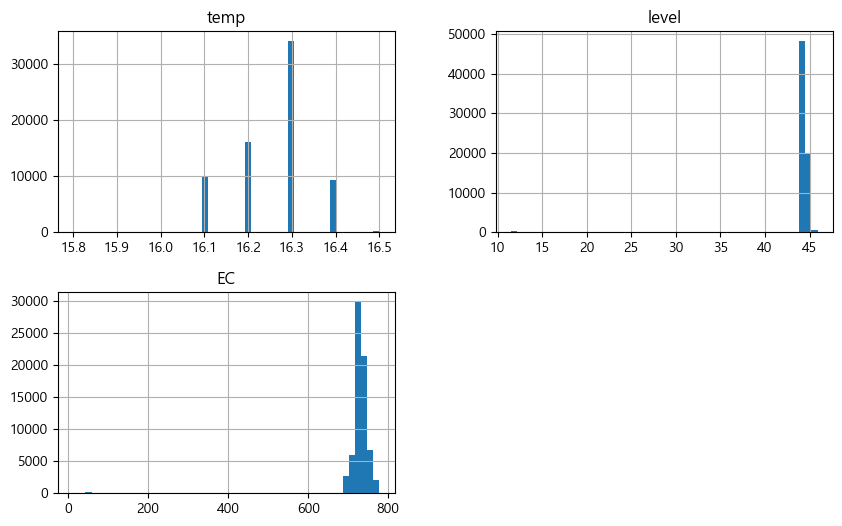

In [24]:
df.hist(bins = 50, figsize = (10,6)) # x축의 간격을 50개로
plt.show()

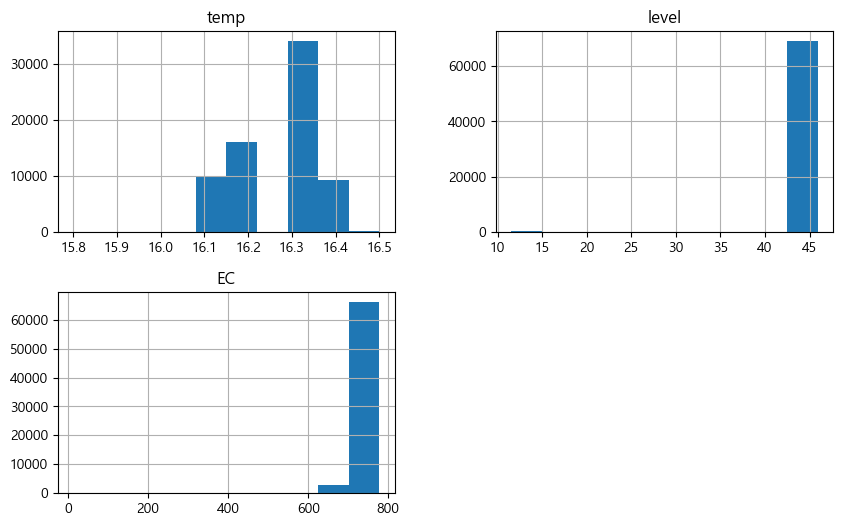

In [25]:
df.hist( figsize = (10,6)) # x축의 간격을 50개로
plt.show()

<Axes: >

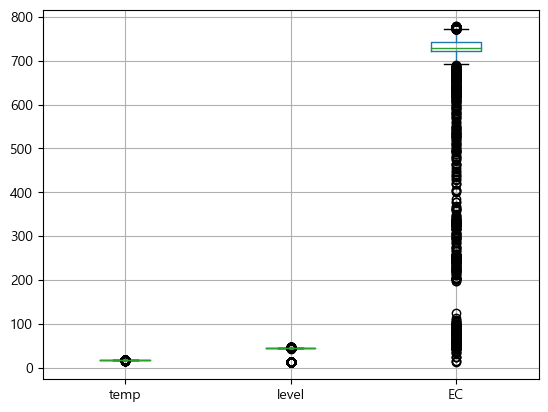

In [27]:
df.boxplot()

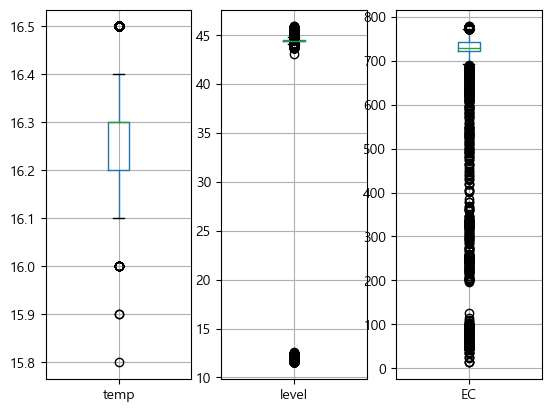

In [28]:
plt.subplot(1,3,1)
df.boxplot(column = 'temp')
plt.subplot(1,3,2)
df.boxplot(column = 'level')
plt.subplot(1,3,3)
df.boxplot(column = 'EC')
plt.show()

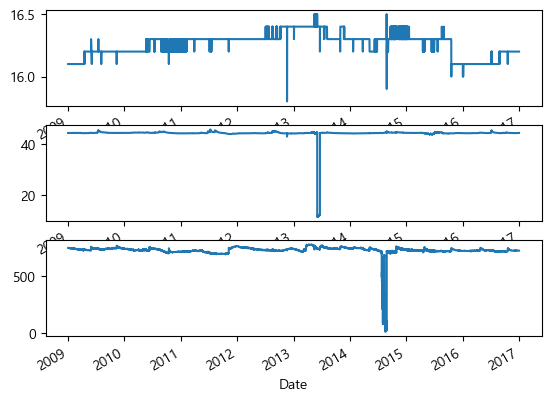

In [29]:
plt.subplot(3, 1, 1)
df['temp'].plot()
plt.subplot(3, 1, 2)
df['level'].plot()
plt.subplot(3, 1, 3)
df['EC'].plot()
plt.show()

In [34]:
q3_temp = df['temp'].quantile(q = 0.75)
q1_temp = df['temp'].quantile(q = 0.25)
iqr_temp = q3_temp - q1_temp
print('IQR temp : ', iqr_temp )

upper_temp = q3_temp + iqr_temp * 1.5
lower_temp = q1_temp - iqr_temp * 1.5

print(f'{upper_temp}  {lower_temp}')

print((df['temp'] > upper_temp ).sum())
print((df['temp'] < lower_temp ).sum())

IQR temp :  0.10000000000000142
16.450000000000003  16.049999999999997
227
15


In [35]:
q3_level = df['level'].quantile(q = 0.75)
q1_level = df['level'].quantile(q = 0.25)
iqr_level = q3_level - q1_level
print('IQR level : ', iqr_level )

upper_level = q3_level + iqr_level * 1.5
lower_level = q1_level - iqr_level * 1.5

print(f'{upper_level}  {lower_level}')

print((df['level'] > upper_level ).sum())
print((df['level'] < lower_level ).sum())

IQR level :  0.17999999999999972
44.81999999999999  44.099999999999994
4492
1273


In [36]:
q3_EC = df['EC'].quantile(q = 0.75)
q1_EC = df['EC'].quantile(q = 0.25)
iqr_EC = q3_EC - q1_EC
print('IQR EC : ', iqr_EC )

upper_EC = q3_EC + iqr_EC * 1.5
lower_EC = q1_EC - iqr_EC * 1.5

print(f'{upper_EC}  {lower_EC}')

print((df['EC'] > upper_EC ).sum())
print((df['EC'] < lower_EC ).sum())

IQR EC :  20.0
772.0  692.0
831
788


In [43]:
df_iqr = df[(df['temp'] < upper_temp) & (df['temp'] > lower_temp)&\
            (df['level'] < upper_level) & (df['level'] > lower_level)&\
            (df['EC'] < upper_EC) & (df['EC'] > lower_EC)]

In [44]:
df_iqr.describe()

,temp,level,EC
count,61814.000000,61814.000000,61814.000000
mean,16.256793,44.459701,731.698612
std,0.089692,0.128256,13.882905
min,16.100000,44.100000,693.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.450000,730.000000
75%,16.300000,44.520000,742.000000
max,16.400000,44.810000,771.000000


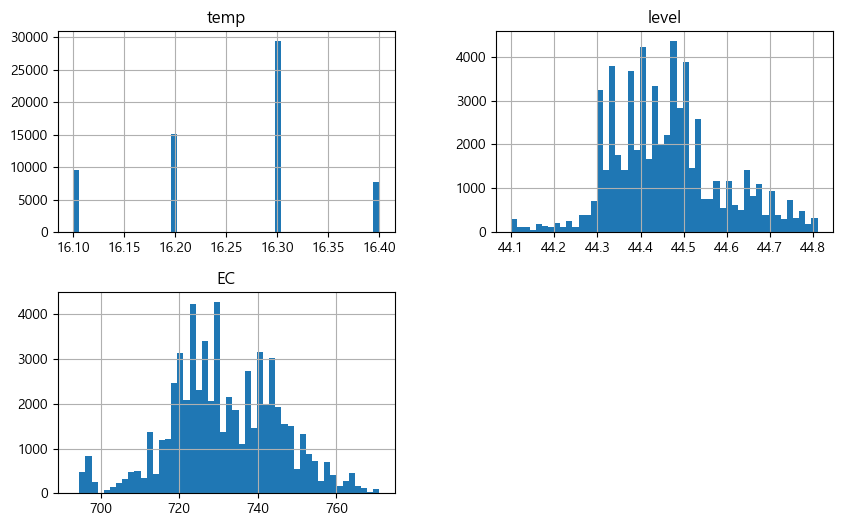

In [47]:
df_iqr.hist(bins = 50, figsize = (10,6)) # x축의 간격을 50개로
plt.show()

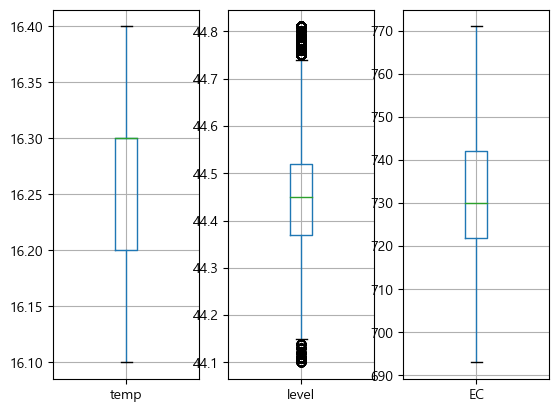

In [48]:
plt.subplot(1, 3, 1)
df_iqr.boxplot(column='temp')
plt.subplot(1, 3, 2)
df_iqr.boxplot(column='level')
plt.subplot(1, 3, 3)
df_iqr.boxplot(column='EC')
plt.show()

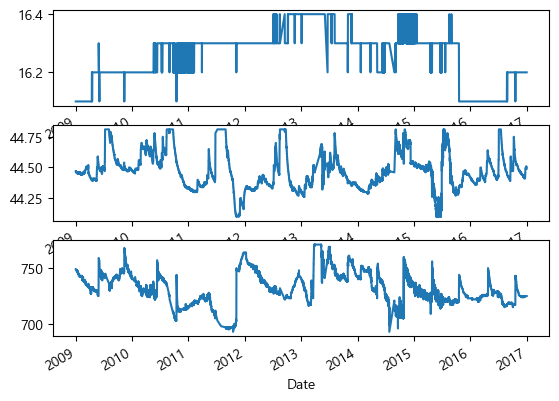

In [49]:
plt.subplot(3, 1, 1)
df_iqr['temp'].plot()
plt.subplot(3, 1, 2)
df_iqr['level'].plot()
plt.subplot(3, 1, 3)
df_iqr['EC'].plot()
plt.show()

In [53]:
df_iqr.to_csv('Data/대전태평(암반)/대전지하수_정제.csv')

In [54]:
df = pd.read_csv('data/대전태평(암반)/대전지하수_정제.csv')
df.head()

,Date,temp,level,EC
0,2009-01-01 00:00:00,16.1,44.47,749
1,2009-01-01 01:00:00,16.1,44.47,749
2,2009-01-01 02:00:00,16.1,44.47,749
3,2009-01-01 03:00:00,16.1,44.47,749
4,2009-01-01 04:00:00,16.1,44.47,749


In [56]:
df1 = df[['level','EC']]
df1.describe()

,level,EC
count,61814.000000,61814.000000
mean,44.459701,731.698612
std,0.128256,13.882905
min,44.100000,693.000000
25%,44.370000,722.000000
50%,44.450000,730.000000
75%,44.520000,742.000000
max,44.810000,771.000000


In [57]:
df2 = df1.copy()
df2.head(3)

,level,EC
0,44.47,749
1,44.47,749
2,44.47,749


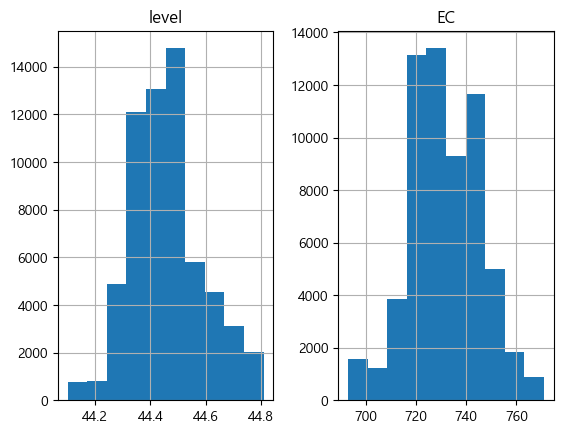

In [58]:
df2.hist()
plt.show()

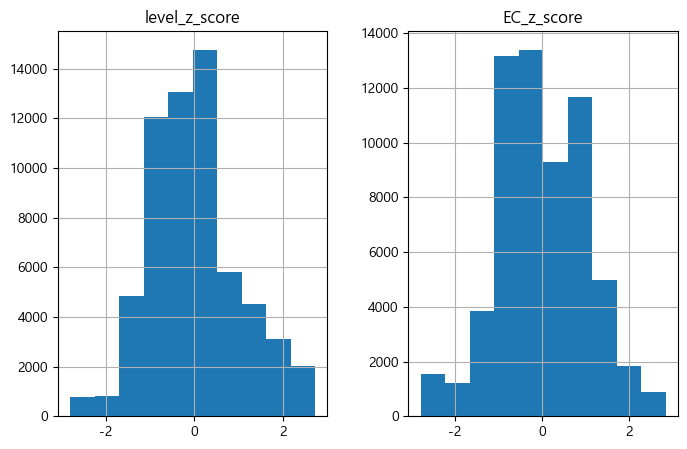

In [59]:
# StandardScaler를 사용하여 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1[['level', 'EC']])

# 표준화된 데이터로 새로운 데이터프레임 생성
df_scaled = pd.DataFrame(scaled_data, columns=['level_z_score', 'EC_z_score'])

# 표준화된 데이터에 대한 히스토그램 출력
df_scaled.hist(figsize=(8,5))
plt.show()

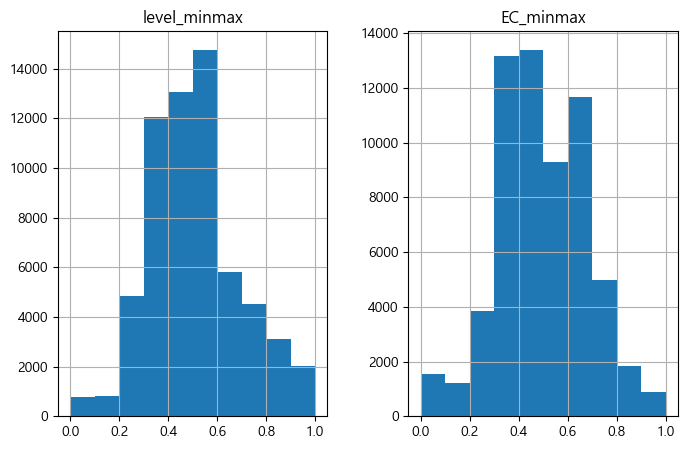

In [60]:
# MinMaxScaler를 사용하여 데이터 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1[['level', 'EC']])

# 정규화된 데이터로 새로운 데이터프레임 생성
df_scaled = pd.DataFrame(scaled_data, columns=['level_minmax', 'EC_minmax'])

# 정규화된 데이터에 대한 히스토그램 출력
df_scaled.hist(figsize=(8,5))
plt.show()